# The Kolmogorov-Smirnov Test - Lab

Introduction

In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python.

Objectives
In this lab you will:

Calculate a one- and two-sample Kolmogorov-Smirnov test
Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
Compare K-S test to visual approaches for testing for normality assumption
Data
Let's import the necessary libraries and generate some data. Run the following cell:

In [2]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

Plots
Plot histograms and Q-Q plots of above datasets and comment on the output

How good are these techniques for checking normality assumptions?
Compare both these techniques and identify their limitations/benefits etc.

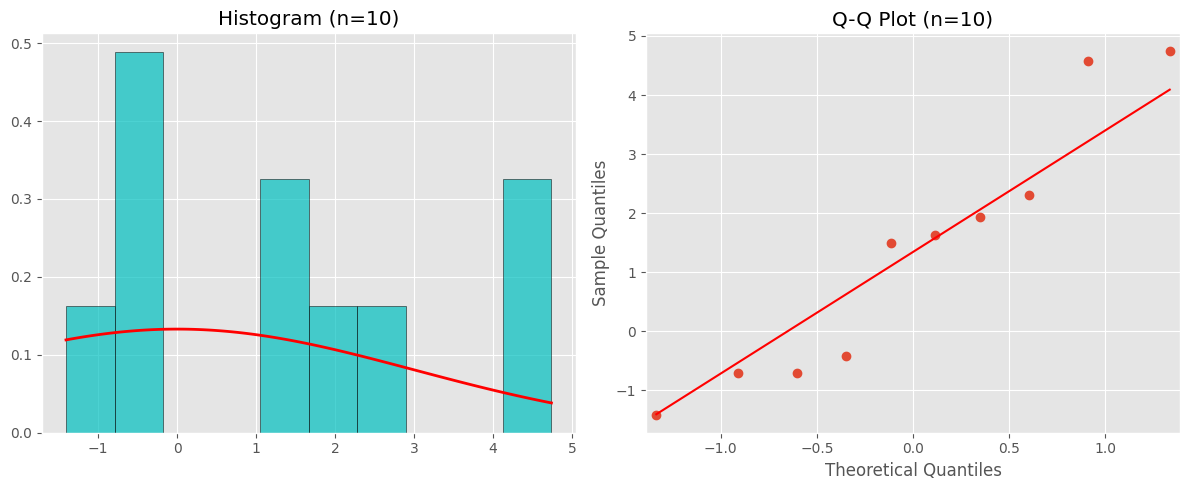

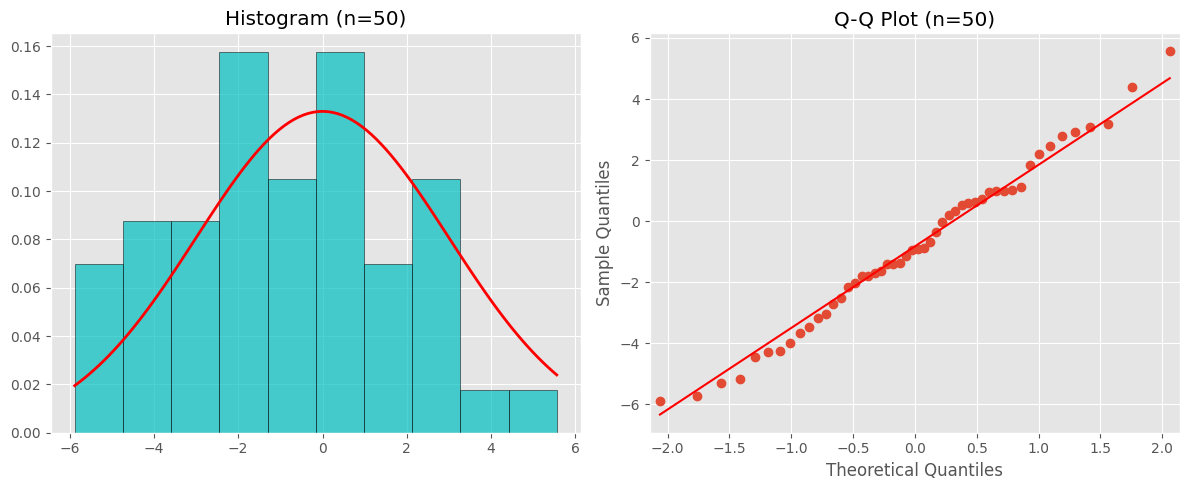

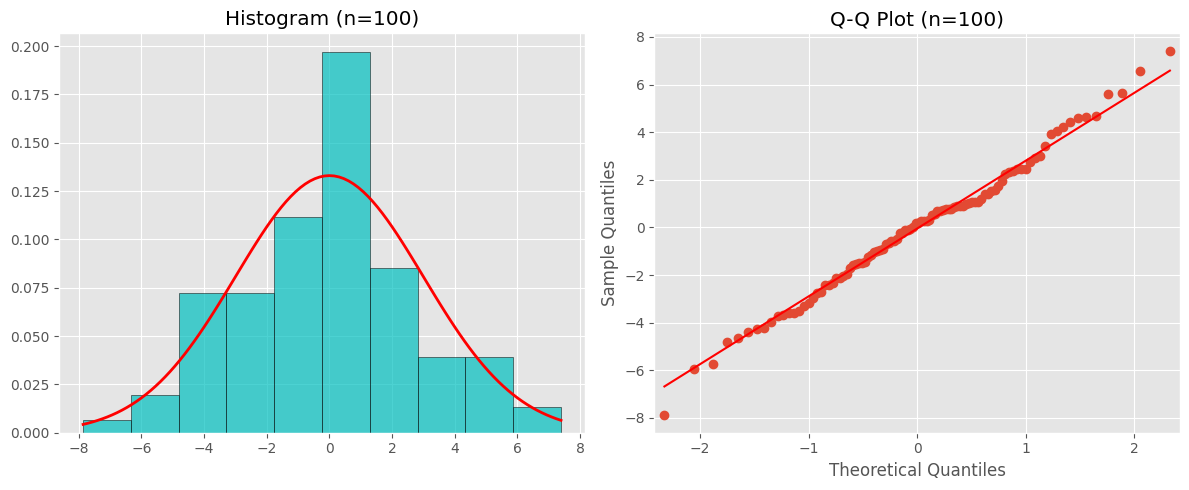

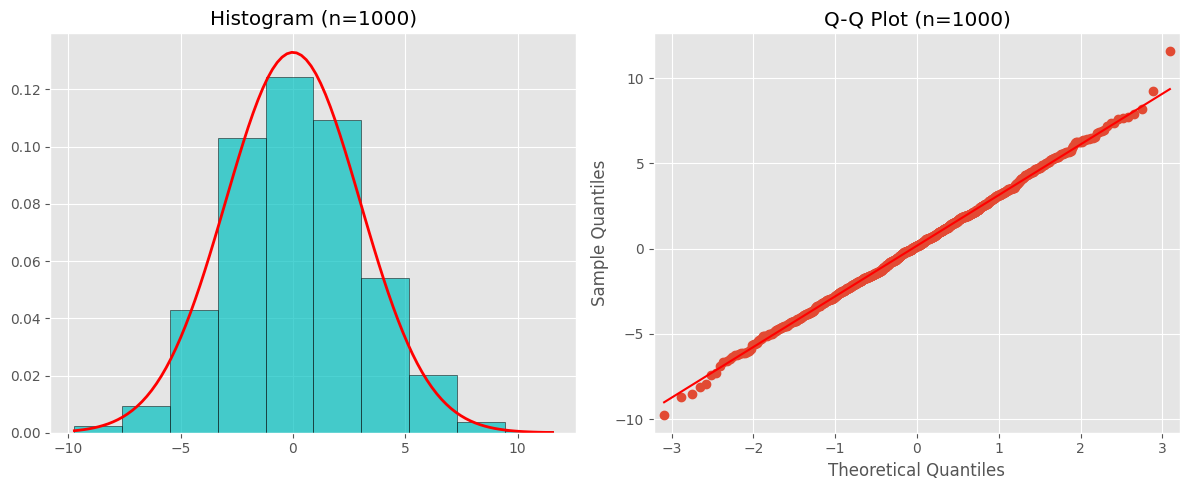

In [3]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Set style
plt.style.use('ggplot')

# Create normal random variables
np.random.seed(42)  # For reproducibility
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

# Define function to plot histograms and Q-Q plots
def plot_hist_qq(data, sample_size):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    axes[0].hist(data, bins=10, density=True, alpha=0.7, color='c', edgecolor='black')
    x = np.linspace(min(data), max(data), 100)
    axes[0].plot(x, stats.norm.pdf(x, loc=0, scale=3), 'r', lw=2)  # True normal distribution
    axes[0].set_title(f'Histogram (n={sample_size})')

    # Q-Q Plot
    sm.qqplot(data, line='s', ax=axes[1])
    axes[1].set_title(f'Q-Q Plot (n={sample_size})')

    plt.tight_layout()
    plt.show()

# Generate plots for different sample sizes
plot_hist_qq(x_10, 10)
plot_hist_qq(x_50, 50)
plot_hist_qq(x_100, 100)
plot_hist_qq(x_1000, 1000)


Create a function to plot the normal CDF and ECDF for a given dataset
Create a function to generate an empirical CDF from data
Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

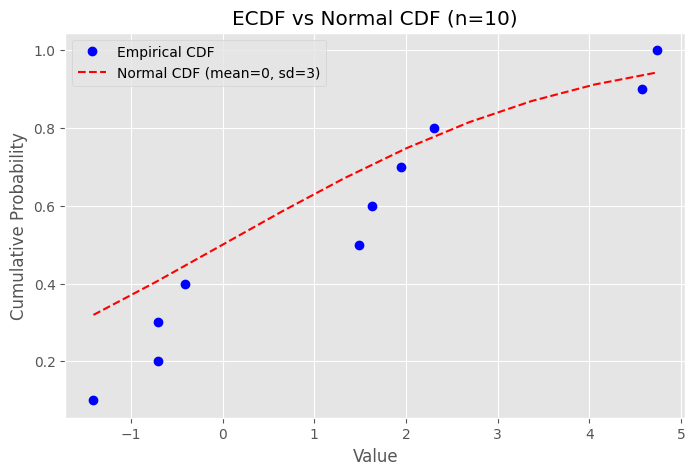

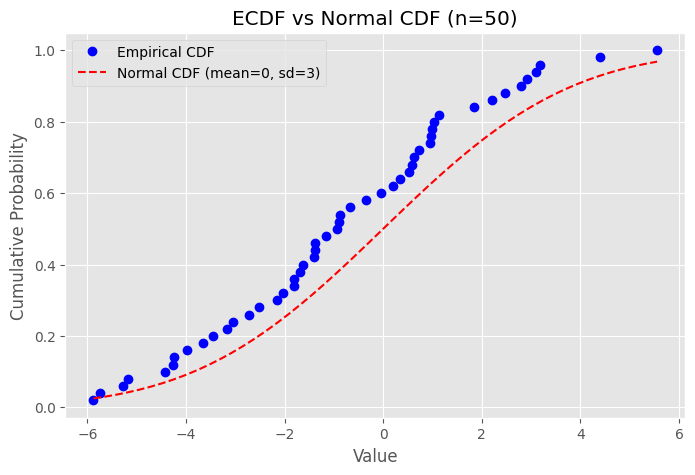

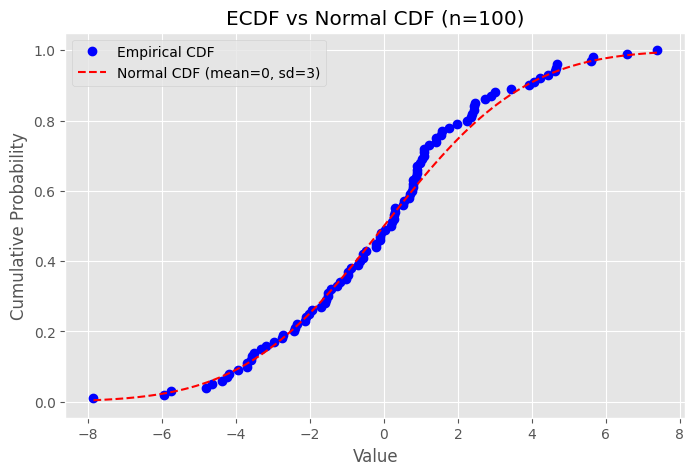

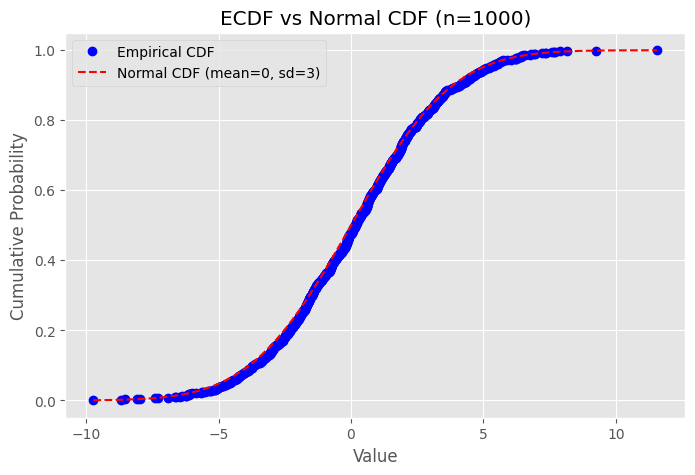

In [4]:
def plot_cdf_ecdf(data, sample_size):
    """
    Plots the Empirical CDF (ECDF) and the Normal CDF for a given dataset.
    
    Parameters:
    data (array-like): The dataset to compute the ECDF.
    sample_size (int): The sample size, used for labeling the plots.
    """
    # Sort data for ECDF
    sorted_data = np.sort(data)
    ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Generate Normal CDF with the same number of points
    normal_x = np.linspace(min(sorted_data), max(sorted_data), len(sorted_data))
    normal_cdf = stats.norm.cdf(normal_x, loc=0, scale=3)  # CDF of N(0,3)

    # Plot ECDF and Normal CDF
    plt.figure(figsize=(8, 5))
    plt.plot(sorted_data, ecdf, marker='o', linestyle='none', label='Empirical CDF', color='b')
    plt.plot(normal_x, normal_cdf, label='Normal CDF (mean=0, sd=3)', color='r', linestyle='dashed')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.title(f'ECDF vs Normal CDF (n={sample_size})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate plots for different sample sizes
plot_cdf_ecdf(x_10, 10)
plot_cdf_ecdf(x_50, 50)
plot_cdf_ecdf(x_100, 100)
plot_cdf_ecdf(x_1000, 1000)
